<a href="https://colab.research.google.com/github/Kgs-Mathaba/Customer_Segmentation_Clustering_EDA/blob/main/Custormer_Segmentation_With_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Introduction

In this project I'll be dividing and grouping all individual customers of a grocery business into clusters based on shared common characteristics. This will be extremely beneficial to the business to understand their customer's needs and wants and cater services in a more personalized manner.

## Project Overview

* Grouped customers into clusters based on shared characteristics between them using K-Means clustering.
* Cleaned, explored and manipulated the entire data extensively on Python to make it usable.
* Engineered new features in accordance with clustering requirements.
* Extracted meaningful insights from the data for each cluster that can help make efficient yet effective business decisions.
* Used K-Means clustering with optimal number of clusters using elbow method.
* Used visualizations extensively to explore and visually interpret the data.





In [161]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [162]:
# Set figure size for visualizations
sns.set(rc={'figure.figsize':(12, 10)})

In [163]:
# Import dataset
url = 'https://raw.githubusercontent.com/Kgs-Mathaba/Customer_Segmentation_Clustering_EDA/main/marketing_campaign.csv'
df = pd.read_csv(url, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [164]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Data Cleaning

In [165]:
# "Z_CostContant" and "Z_Revenue" are not important features and can be dropped
df.drop(['Z_CostContact', "Z_Revenue"], axis=1, inplace=True)

In [166]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


In [167]:
# Check for null values
for column in df.columns:
  if df[column].isna().sum() != 0:
    print('Feature Names: ', column, "\nNAN Count:", df[column].isna().sum())

Feature Names:  Income 
NAN Count: 24


## Drop these 24 entries since income is an important feature, that we cannot impute.


In [168]:
df.dropna(inplace=True) #drop row with null values

In [169]:
df.shape

(2216, 27)

In [170]:
df['ID'].nunique(), len(df) # all customers are unique

(2216, 2216)

In [171]:
# Check datatype
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [172]:
# Change "DT_Customer" from object to date time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,0,20,1,0,0,0,0,0,0


## Create new feature to show how long a person has been a customer to the business

In [173]:
df['dayscustomerfor'] = max(df['Dt_Customer']) - df['Dt_Customer'] 
df['dayscustomerfor'] = df['dayscustomerfor'].apply(lambda x: int(str(x).split(' ')[0]))
df.sort_values(by=['dayscustomerfor'])

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dayscustomerfor
989,453,1956,PhD,Widow,35340.0,1,1,2014-06-29,1,27,...,3,5,0,0,0,0,0,0,0,0
200,7300,1952,Graduation,Divorced,69142.0,0,1,2014-06-29,50,448,...,7,5,0,1,0,0,0,0,0,0
1812,8093,1969,Master,Married,79734.0,0,0,2014-06-28,72,572,...,6,1,0,0,0,1,0,0,0,1
796,6722,1954,PhD,Married,70421.0,0,1,2014-06-28,98,479,...,7,6,0,0,0,0,0,0,0,1
45,1371,1976,Graduation,Single,79941.0,0,0,2014-06-28,72,123,...,9,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,2611,1959,Master,Together,82576.0,0,0,2012-08-01,66,1206,...,12,1,0,0,1,0,0,0,0,697
2029,10001,1985,2n Cycle,Together,7500.0,1,0,2012-08-01,98,5,...,3,9,0,0,0,0,0,0,0,697
2194,7118,1957,Graduation,Married,73803.0,0,1,2012-08-01,61,833,...,6,6,1,0,0,0,0,0,1,697
1363,6181,1950,2n Cycle,Together,52203.0,0,0,2012-07-31,36,488,...,11,6,0,0,0,0,0,0,0,698


In [174]:
df['dayscustomerfor'].describe()

count    2216.000000
mean      353.521209
std       202.434667
min         0.000000
25%       180.000000
50%       355.500000
75%       529.000000
max       699.000000
Name: dayscustomerfor, dtype: float64

## Anyone who registered in the last 30% of the days will be a new customer and rest all will be old customer.

In [175]:
# create mask to filter out data and categorise
masknew = df['dayscustomerfor'] <= df['dayscustomerfor'].quantile(0.3)
maskold = df['dayscustomerfor'] > df['dayscustomerfor'].quantile(0.3)
df.loc[masknew, 'Cust_Seniority'] = 'New'
df.loc[maskold, 'Cust_Seniority'] = 'Old'
df['Cust_Seniority'].value_counts() # display the New and old value counts

Old    1550
New     666
Name: Cust_Seniority, dtype: int64

### Derive the age of all customers

In [176]:
# check max year of date list
max(df['Dt_Customer'])

Timestamp('2014-06-29 00:00:00')

In [177]:
df["Age"] = 2014 - df["Year_Birth"]
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dayscustomerfor,Cust_Seniority,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,1,663,Old,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,0,113,New,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,0,312,Old,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,0,139,New,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,0,161,New,33
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,0,293,Old,47
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,0,593,Old,43
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,0,0,0,0,0,0,417,Old,29
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,1,388,Old,40
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,0,108,New,64


In [178]:
df['Age'].value_counts()

38     89
43     86
39     83
42     78
36     76
44     75
49     74
41     72
45     70
40     69
58     55
35     53
56     52
37     52
62     52
46     51
48     50
55     50
60     49
54     49
59     48
32     44
51     44
52     44
47     44
63     42
31     41
28     41
57     41
50     41
34     39
33     38
30     38
53     35
61     35
29     32
65     30
25     29
26     29
64     29
27     27
66     21
24     18
68     16
67     16
23     15
22     13
69      8
70      7
71      6
19      5
21      5
20      3
18      2
115     1
73      1
121     1
114     1
74      1
Name: Age, dtype: int64

 ### Check different *types* and counts in **Education** feature

In [179]:
df['Education'].value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [180]:
# Simplify category
df['Education'] = df['Education'].replace({'Basic':'Undergraduate', "2n Cycle":"Undergraduate", 'Graduation':'Graduate', "Master":"Postgraduate", "PhD":'Postgraduate'})


In [181]:
df['Education'].value_counts()

Graduate         1116
Postgraduate      846
Undergraduate     254
Name: Education, dtype: int64

### Check Marital Status

In [182]:
df['Marital_Status'].value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [183]:
# Simplify to Couple or not
df['Couple'] = df['Marital_Status'].apply(lambda x: 1 if (x == 'Married' or x == 'Together') else 0)

In [184]:
df['Couple'].value_counts()

1    1430
0     786
Name: Couple, dtype: int64

In [185]:
# Add "Kidhome" and "Teenhome" as number of children
df['Children'] = df['Kidhome'] + df['Teenhome']

In [186]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,dayscustomerfor,Cust_Seniority,Age,Couple,Children
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,663,Old,57,0,0
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,113,New,60,0,2
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,312,Old,49,1,0
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,139,New,30,1,1
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,161,New,33,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,381,Old,47,1,1
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,0,19,New,68,1,3
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,155,New,33,0,0
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,156,New,58,1,1


In [187]:
# Combine all spends on products to get the total amount of money spent by customer
df['Total_spend'] = df['MntWines']+ df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [188]:
df['Total_spend'].describe()

count    2216.000000
mean      607.075361
std       602.900476
min         5.000000
25%        69.000000
50%       396.500000
75%      1048.000000
max      2525.000000
Name: Total_spend, dtype: float64

In [189]:
# Rename items
df = df.rename(columns={"MntWines": "Wines",
                        "MntFruits":"Fruits",
                        "MntMeatProducts": "Meat",
                        "MntFishProducts": "Fish",
                        "MntSweetProducts":"Sweets",
                        "MntGoldProds": "Gold"})

In [190]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,dayscustomerfor,Cust_Seniority,Age,Couple,Children,Total_spend
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,663,Old,57,0,0,1617
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,113,New,60,0,2,27
2,4141,1965,Graduate,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,312,Old,49,1,0,776
3,6182,1984,Graduate,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,139,New,30,1,1,53
4,5324,1981,Postgraduate,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,161,New,33,1,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduate,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,381,Old,47,1,1,1341
2236,4001,1946,Postgraduate,Together,64014.0,2,1,2014-06-10,56,406,...,1,0,0,0,19,New,68,1,3,444
2237,7270,1981,Graduate,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,155,New,33,0,0,1241
2238,8235,1956,Postgraduate,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,156,New,58,1,1,843


In [191]:
# Combine all the campaigns accepted by customer to find the total number of campaigns accepted
df['Total_campaigns_accepted'] = df['AcceptedCmp1']+ df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+ df['Response']

In [192]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'dayscustomerfor',
       'Cust_Seniority', 'Age', 'Couple', 'Children', 'Total_spend',
       'Total_campaigns_accepted'],
      dtype='object')

In [193]:
# Drop all redundant features
to_drop = ['ID', "Year_Birth",
           "Marital_Status",
           "Kidhome",
           "Teenhome",
           "Dt_Customer",
           "Recency",
           "AcceptedCmp3",
           "AcceptedCmp4",
           "AcceptedCmp5",
           "AcceptedCmp1",
           "AcceptedCmp2",
           "Response",
           "dayscustomerfor"]
df.drop(to_drop, axis=1, inplace=True)

In [194]:
df.dtypes

Education                    object
Income                      float64
Wines                         int64
Fruits                        int64
Meat                          int64
Fish                          int64
Sweets                        int64
Gold                          int64
NumDealsPurchases             int64
NumWebPurchases               int64
NumCatalogPurchases           int64
NumStorePurchases             int64
NumWebVisitsMonth             int64
Complain                      int64
Cust_Seniority               object
Age                           int64
Couple                        int64
Children                      int64
Total_spend                   int64
Total_campaigns_accepted      int64
dtype: object

In [195]:
df['Age'] = df['Age'].astype('int64')

## Check for *Outliers* by plotting boxplot

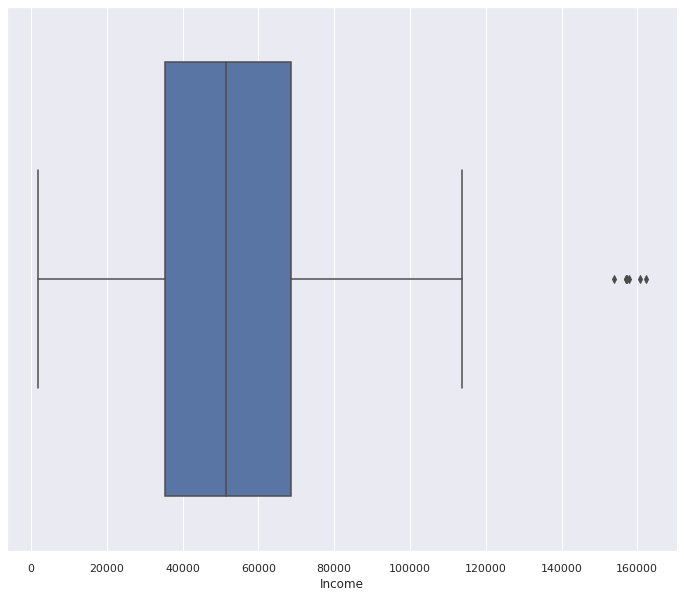

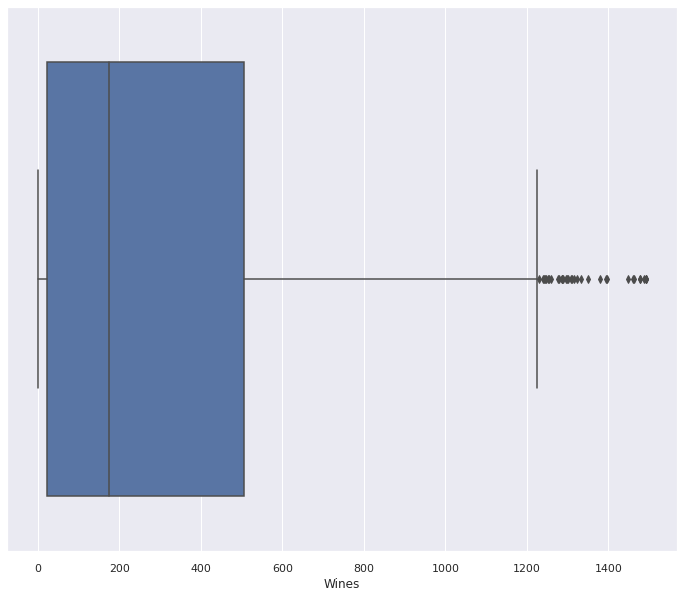

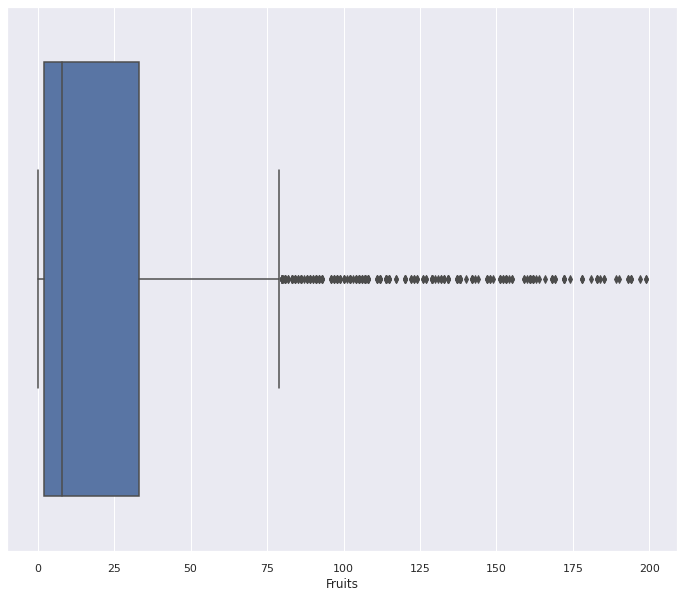

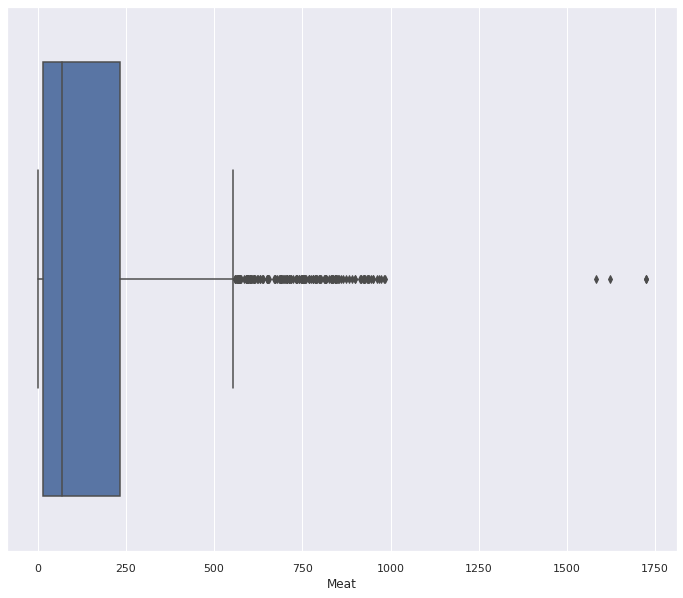

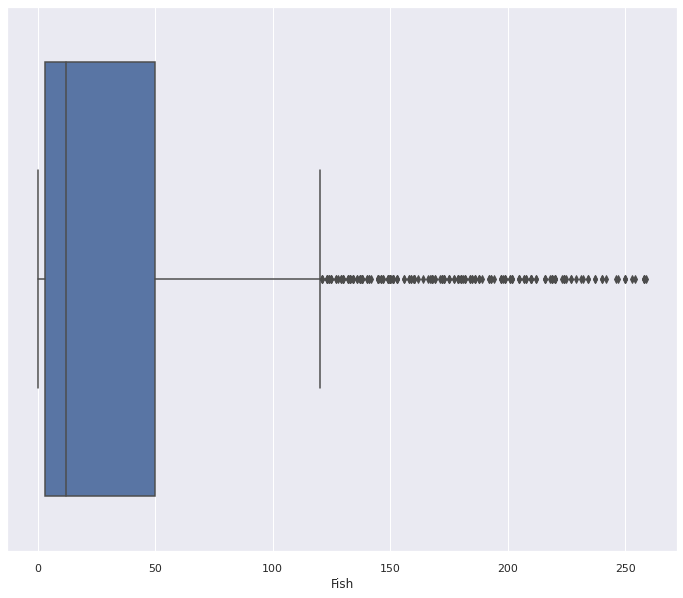

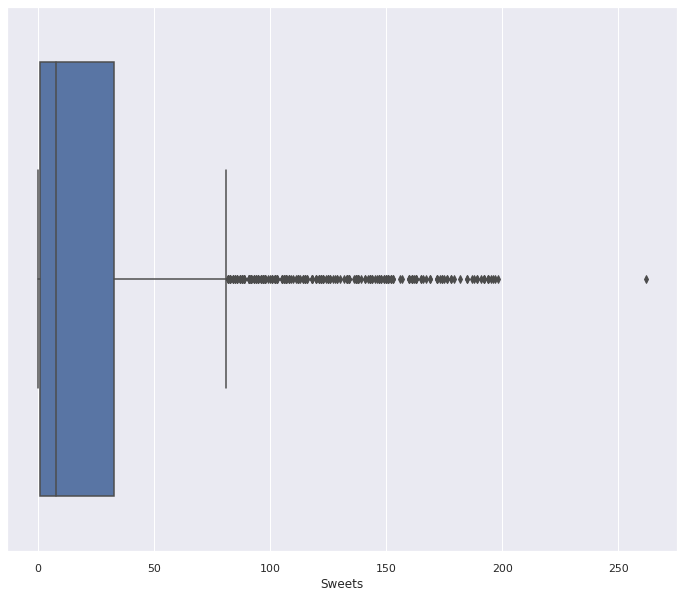

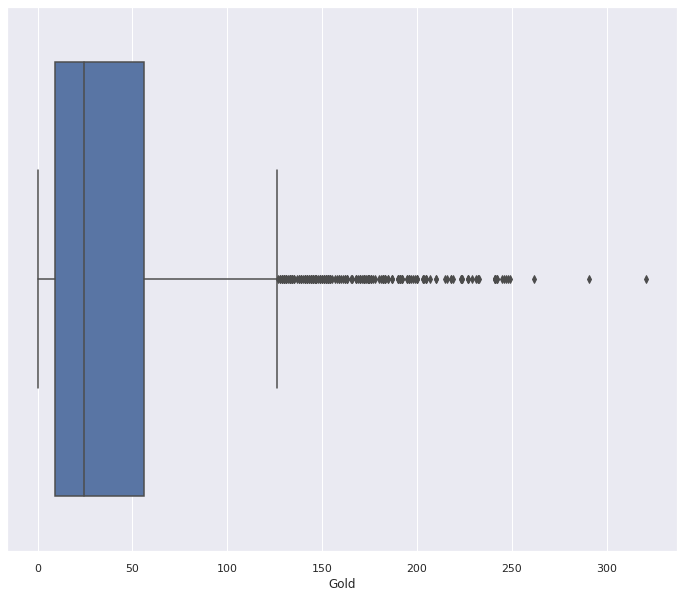

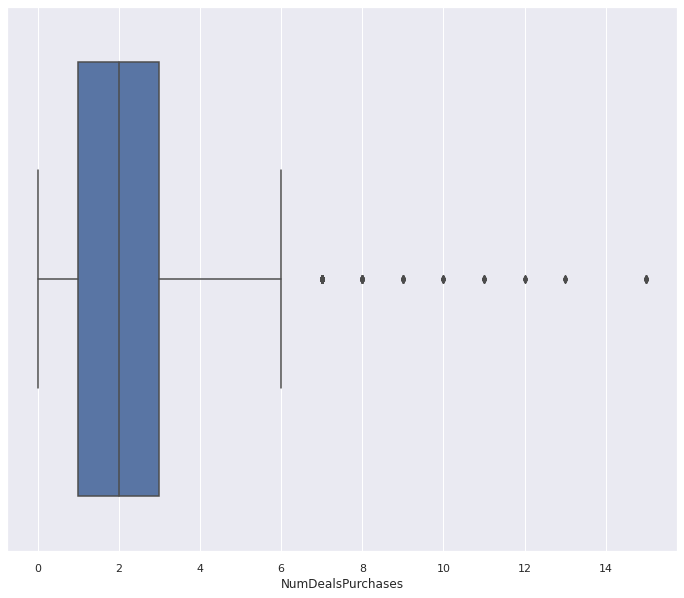

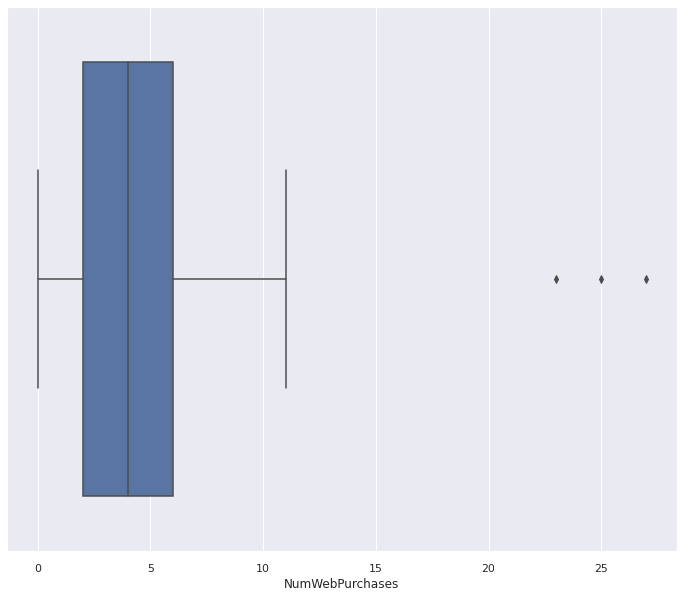

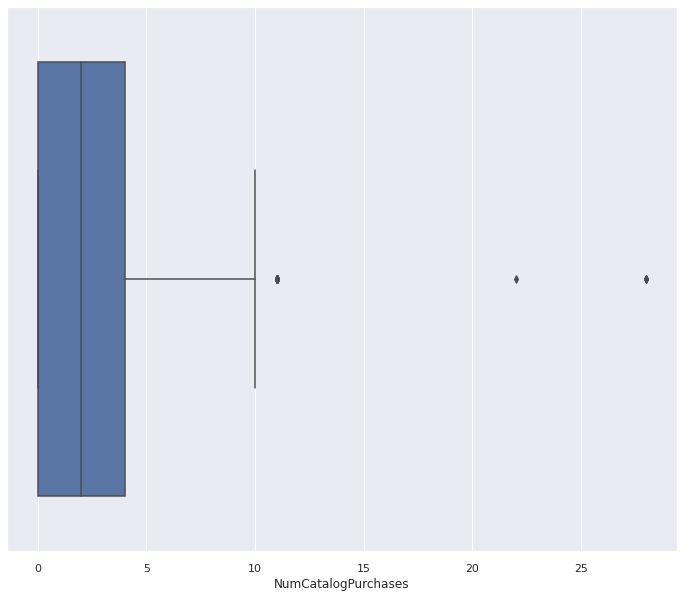

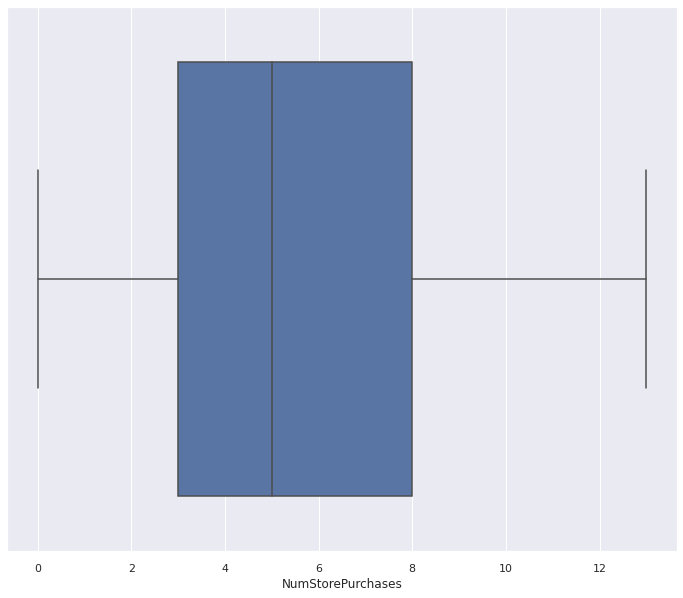

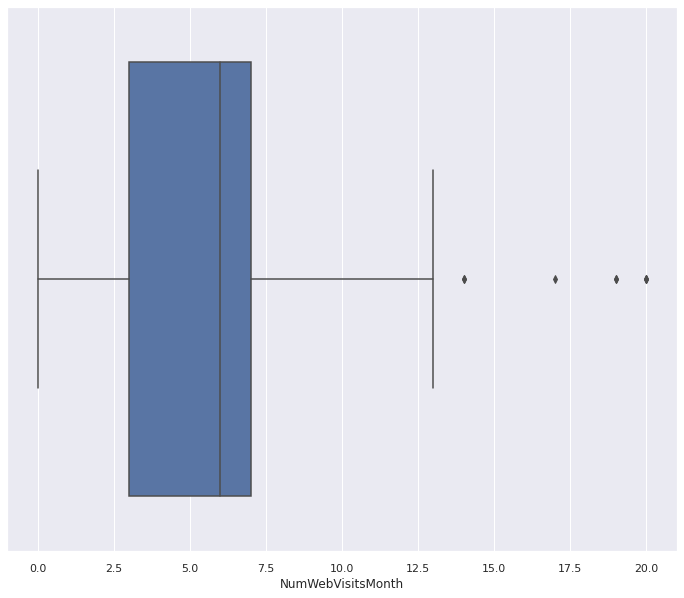

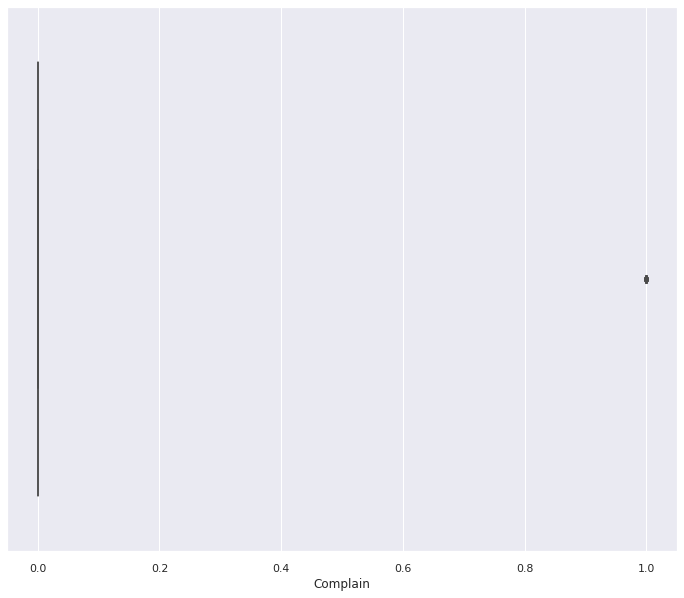

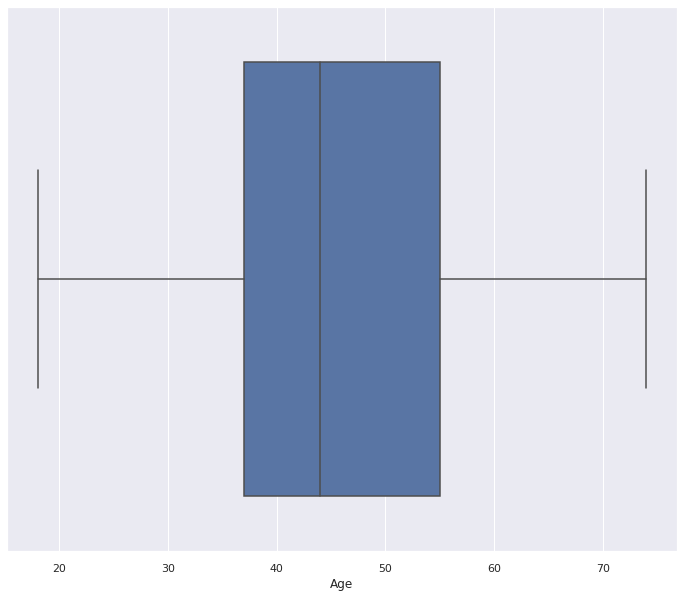

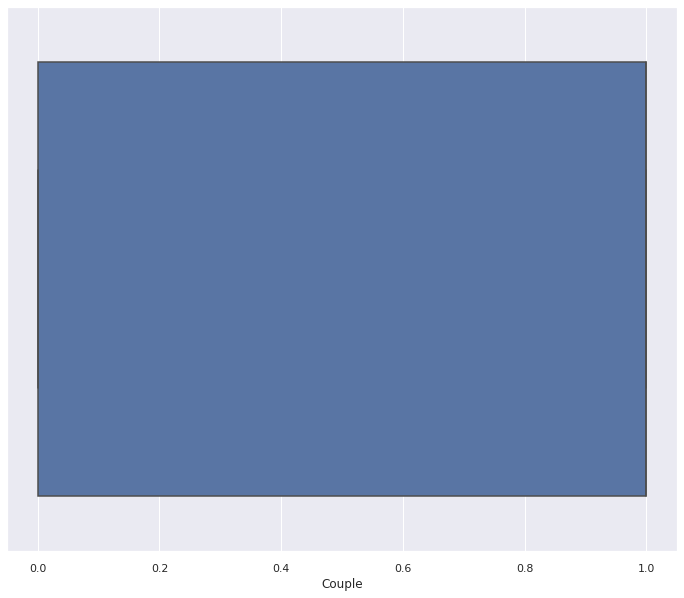

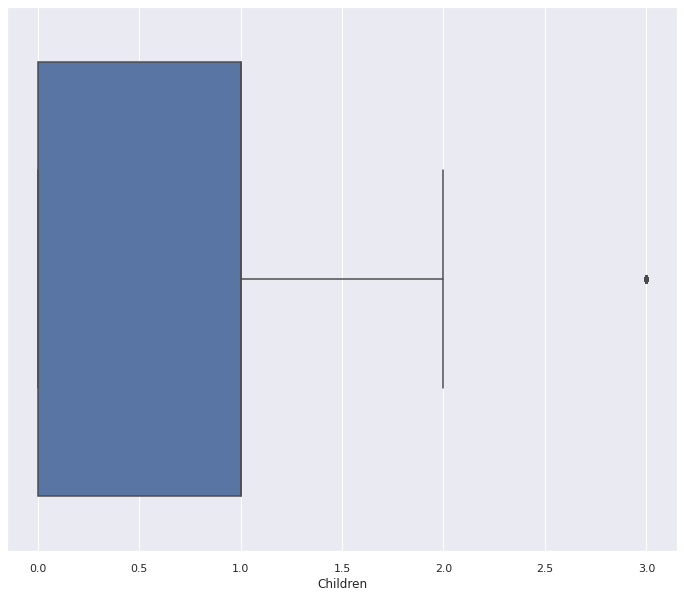

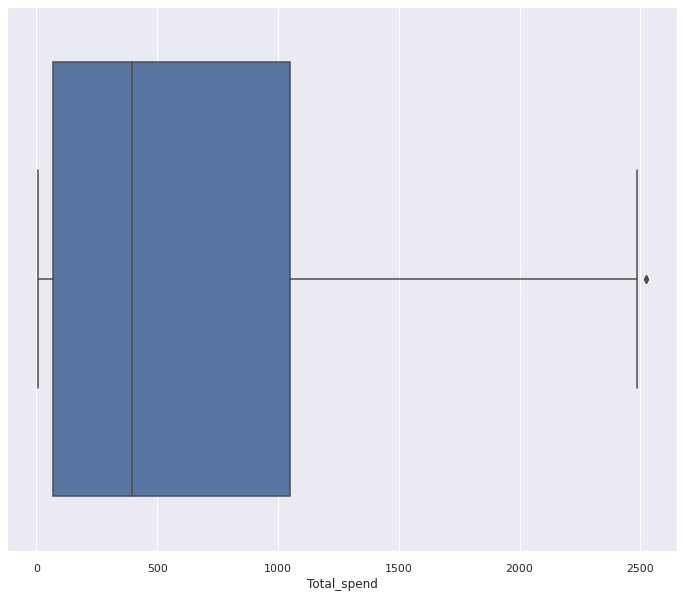

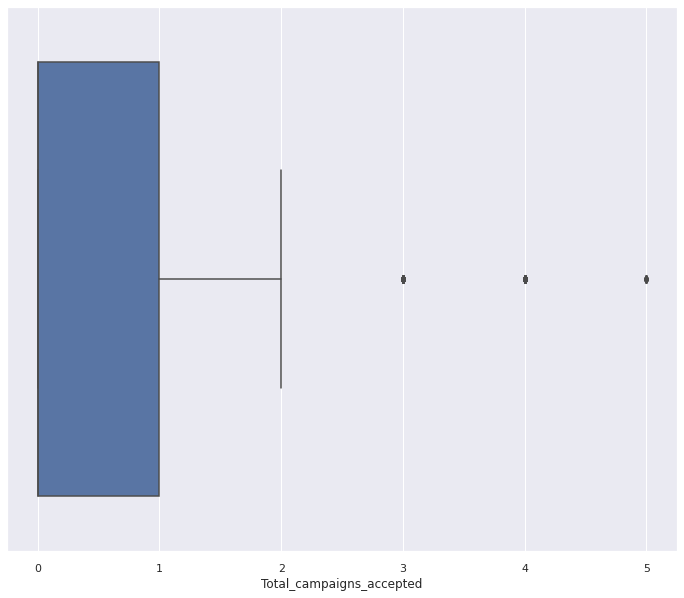

In [210]:
# Box plot for all numerical features

for i in df.columns:
  if df[i].dtype != "object":
    plt.figure(i)
    sns.boxplot(data=df, x=i)

## There are *Outliers* in the "Income" and "Age" features.

In [197]:
df[df["Income"] > 600000] #Income outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
2233,Graduate,666666.0,9,14,18,8,1,12,4,3,1,3,6,0,Old,37,1,1,62,0


In [200]:
df[df['Age'] > 100] # age outlier

,Education,Income,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Cust_Seniority,Age,Couple,Children,Total_spend,Total_campaigns_accepted
192,Undergraduate,36640.0,15,6,8,7,4,25,1,2,1,2,5,1,Old,114,0,1,65,0
239,Undergraduate,60182.0,8,0,5,7,0,2,1,1,0,2,4,0,New,121,0,1,22,0
339,Postgraduate,83532.0,755,144,562,104,64,224,1,4,6,4,1,0,Old,115,1,0,1853,1


In [199]:
df['Age'].describe()

count    2216.000000
mean       45.179603
std        11.985554
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

In [201]:
# Filter pour outlier
df = df[df['Income'] < 600000]
df = df[df['Age']<100]

In [209]:
# Groupby with eduaction to check income stats
df.groupby('Education')["Income"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,52169.75,21354.32,1730.0,34831.0,51983.0,69915.5,157146.0
Postgraduate,845.0,54718.66,20456.55,4023.0,38829.0,54108.0,68352.0,162397.0
Undergraduate,252.0,41771.25,22828.77,7500.0,23551.5,35916.5,60330.5,96547.0


### We see that Postgraduates have the highest average income followed by Graduates whereas Undergraduates have the lowest average income in comparison.

Lets find out if people with higher education and income actually spend more on purchases?



In [212]:
# Groupby wtih eduaction and check totla spend
df.groupby('Education')['Total_spend'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,1115.0,622.19,600.19,5.0,70.50,415.0,1077.5,2524.0
Postgraduate,845.0,646.42,620.12,8.0,86.00,426.0,1092.0,2525.0
Undergraduate,252.0,409.98,510.59,13.0,50.75,98.0,729.0,2257.0
